In [7]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere
from qiskit.quantum_info import partial_trace
from scipy.linalg import expm
import numpy as np

In [34]:
def uniform_matrix(n):
    N = 2**n
    v = np.ones((N,1))*(1/np.sqrt(N))
    m = np.matmul(v, v.T.conj())
    return m

def H1_op(delt, n):
    N = 2**n
    h1 = QuantumCircuit(n+1, name='H1')
    H= np.zeros((N,N))
    H[N-1][N-1] = 1
    H = H*(-1j*delt)
    exp_H = expm(H)
    h1.unitary(exp_H, range(n))
    return h1.to_gate()

def H2_op(delt, n):
    N = 2**n
    h2 = QuantumCircuit(n+1, name='H2')
    H = uniform_matrix(n)
    H = H*(-1j*delt)
    exp_H = expm(H)
    h2.unitary(exp_H, range(n))
    return h2.to_gate()

def H_op(delt, n):
    N = 2**n
    h1 = QuantumCircuit(n+1, name='H')
    H= np.zeros((N,N))
    H[N-1][N-1] = 1
    H = H + uniform_matrix(n)
    H = H*(-1j*delt)
    exp_H = expm(H)
    h1.unitary(exp_H, range(n))
    return h1.to_gate()

def getEpsilon(final_vector, m):
    """
    get the epsilon of the result, should lower than the theorical epsilon

    ERRORS: Have problems!
    """
    distance_vector = final_vector.data
    if distance_vector[m-1] > 0:
        distance_vector[m-1] -= 1
    else:
        distance_vector[m-1] += 1
    return np.sqrt(np.sum(distance_vector.conj().T*distance_vector))

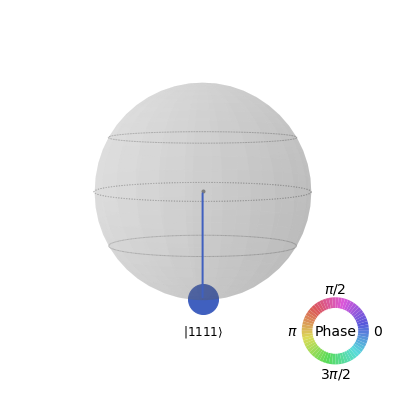

In [37]:
n = 4
N = 2**n
states = []
sim_h = QuantumCircuit(n+1)
sim_h.h(range(n))

alpha = 1/np.sqrt(N)

# method1
sim_h.append(H_op(np.pi/(2*alpha),n), range(n+1))

# method2
# sim_h.append(H1_op(np.pi/(2*alpha),n), range(n+1))
# sim_h.append(H2_op(np.pi/(2*alpha),n), range(n+1))

out = partial_trace(Statevector(sim_h), [n])
plot_state_qsphere(out)

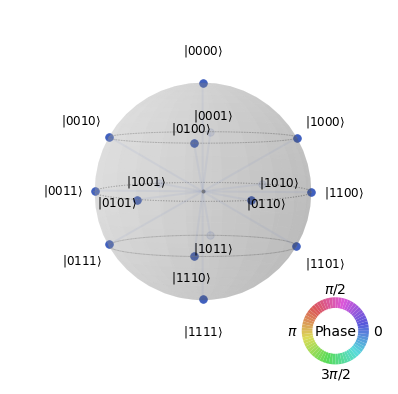

In [38]:
sim_h = QuantumCircuit(n+1)
sim_h.h(range(n))

alpha = 1/np.sqrt(N)

# method1
# sim_h.append(H_op(np.pi/(2*alpha),n), range(n+1))

# method2
sim_h.append(H1_op(np.pi/(2*alpha),n), range(n+1))
sim_h.append(H2_op(np.pi/(2*alpha),n), range(n+1))

out = partial_trace(Statevector(sim_h), [n])
plot_state_qsphere(out)

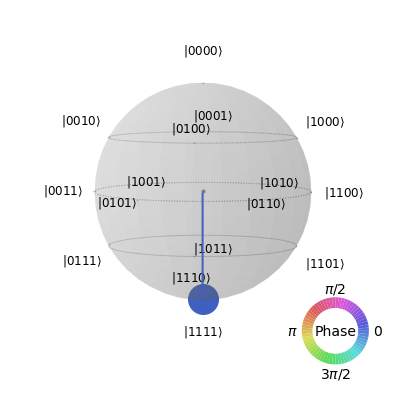

In [39]:

sim_h = QuantumCircuit(n+1)
sim_h.h(range(n))

alpha = 1/np.sqrt(N)

# method2
r = 10
for _ in range(r):
    sim_h.append(H1_op(np.pi/(2*alpha*r),n), range(n+1))
    sim_h.append(H2_op(np.pi/(2*alpha*r),n), range(n+1))

out = partial_trace(Statevector(sim_h), [n])
plot_state_qsphere(out)

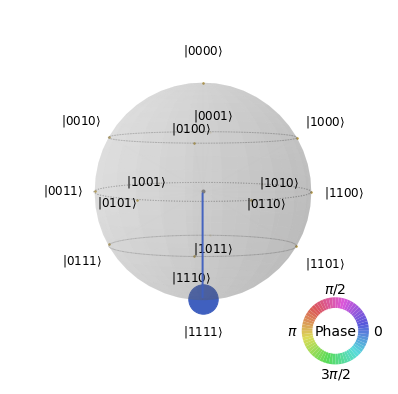

In [40]:

sim_h = QuantumCircuit(n+1)
sim_h.h(range(n))

alpha = 1/np.sqrt(N)

# method1
# sim_h.append(H_op(np.pi/(2*alpha),n), range(n+1))

# method2
# sim_h.append(H1_op(np.pi/(2*alpha),n), range(n+1))
# sim_h.append(H2_op(np.pi/(2*alpha),n), range(n+1))

# method3
r = (int)(np.pi*np.sqrt(2**n)/4)
for _ in range(r):
    sim_h.append(H1_op(np.pi,n), range(n+1))
    sim_h.append(H2_op(np.pi,n), range(n+1))

out = partial_trace(Statevector(sim_h), [n])
plot_state_qsphere(out)

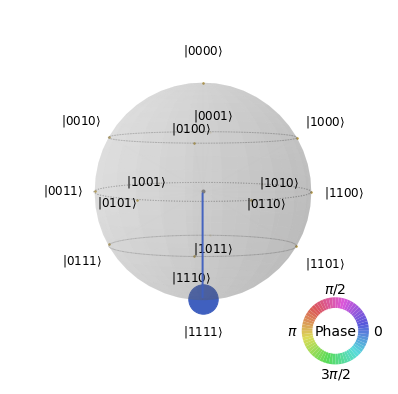

In [41]:
qc = QuantumCircuit(n+1, name='Oracle')
qc.mct(list(range(n)), n)

Oracle = qc.to_gate()

qc = QuantumCircuit(n+1, name='Amp')
qc.h(range(n))
qc.x(range(n))
qc.mct(list(range(n)), n)
qc.x(range(n))
qc.h(range(n))

Amp = qc.to_gate()

grover = QuantumCircuit(n+1)
grover.x(n)
grover.h(range(n+1))
r = (int)(np.pi*np.sqrt(2**n)/4)

for _ in range(r):
    grover.append(Oracle, range(n+1))
    grover.append(Amp, range(n+1))

grover.h(n)
grover.x(n)

out = partial_trace(Statevector(grover), [n])
plot_state_qsphere(out)

In [42]:
st_simh = Statevector.from_instruction(sim_h)
st_grover = Statevector.from_instruction(grover)
print(st_simh)
print(st_grover)
print('grover circuit and sim_h circuit genrate the same output state: ' ,st_simh == st_grover)

Statevector([ 0.05078125+1.17362511e-17j,  0.05078125+5.07675294e-17j,
              0.05078125+8.06915093e-17j,  0.05078125+5.33696146e-17j,
              0.05078125+2.99508476e-17j,  0.05078125+6.11758702e-17j,
              0.05078125+8.71967223e-17j,  0.05078125+6.11758702e-17j,
              0.05078125+4.49128376e-17j,  0.05078125+6.96326472e-17j,
              0.05078125+5.59716998e-17j,  0.05078125+8.29683339e-17j,
              0.05078125+8.26430732e-17j,  0.05078125+7.92278364e-17j,
              0.05078125+1.02727918e-16j, -0.98046875+3.33256078e-16j,
              0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
              0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
              0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
              0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
              0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
              0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
      